In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv("QVI_data.csv")
df.head(3)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [4]:
df.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,2.648340e+05,264834.000000,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000
mean,1.355488e+05,135.079423,1.351576e+05,56.583554,1.905813,7.299346,182.425512
std,8.057990e+04,76.784063,7.813292e+04,32.826444,0.343436,2.527241,64.325148
min,1.000000e+03,1.000000,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,7.002100e+04,70.000000,6.760050e+04,28.000000,2.000000,5.400000,150.000000
50%,1.303570e+05,130.000000,1.351365e+05,56.000000,2.000000,7.400000,170.000000
75%,2.030940e+05,203.000000,2.026998e+05,85.000000,2.000000,9.200000,175.000000
max,2.373711e+06,272.000000,2.415841e+06,114.000000,5.000000,29.500000,380.000000


### Preprocessing

In [5]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264834 non-null  int64         
 1   DATE              264834 non-null  datetime64[ns]
 2   STORE_NBR         264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   PACK_SIZE         264834 non-null  int64         
 9   BRAND             264834 non-null  object        
 10  LIFESTAGE         264834 non-null  object        
 11  PREMIUM_CUSTOMER  264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 24.2+ MB


In [7]:
df['month'] = df['DATE'].dt.month

In [8]:
df['month_year'] = df['DATE'].dt.to_period('M')

In [9]:
grouped = df.groupby('STORE_NBR')['month_year'].nunique().reset_index(name = 'tot_month')

In [10]:
cleaned_nbr = grouped[grouped['tot_month'] == 12]['STORE_NBR']

In [11]:
cleaned_df = df[df['STORE_NBR'].isin(cleaned_nbr)]

In [12]:
cleaned_df.head(3)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,month,month_year
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,10,2018-10
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,9,2018-09
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,3,2019-03


In [13]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264645 entries, 0 to 264833
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264645 non-null  int64         
 1   DATE              264645 non-null  datetime64[ns]
 2   STORE_NBR         264645 non-null  int64         
 3   TXN_ID            264645 non-null  int64         
 4   PROD_NBR          264645 non-null  int64         
 5   PROD_NAME         264645 non-null  object        
 6   PROD_QTY          264645 non-null  int64         
 7   TOT_SALES         264645 non-null  float64       
 8   PACK_SIZE         264645 non-null  int64         
 9   BRAND             264645 non-null  object        
 10  LIFESTAGE         264645 non-null  object        
 11  PREMIUM_CUSTOMER  264645 non-null  object        
 12  month             264645 non-null  int32         
 13  month_year        264645 non-null  period[M]     
dtypes: dateti

In [14]:
exclude_months = pd.PeriodIndex(
    ['2019-02', '2019-03', '2019-04'],
    freq='M'
)

filtered_month = cleaned_df[~cleaned_df['month_year'].isin(exclude_months)]

In [15]:
filtered_month.head(3)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,month,month_year
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,10,2018-10
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,9,2018-09
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,11,2018-11


In [16]:
grouped_df = filtered_month.groupby(['STORE_NBR', 'month_year']).agg(tot_sales_rev = ('TOT_SALES', 'sum'), tot_cust = ('LYLTY_CARD_NBR', 'nunique')).reset_index()

In [17]:
grouped_df.head(3)

,STORE_NBR,month_year,tot_sales_rev,tot_cust
0,1,2018-07,206.9,49
1,1,2018-08,176.1,42
2,1,2018-09,278.8,59


### Find control stores

In [131]:
def get_store_corr(df, trial_store):
    df_sales = df[['STORE_NBR', 'month_year', 'tot_sales_rev']]
    sales_pivot = df_sales.pivot_table(values = 'tot_sales_rev', index = 'month_year', columns = 'STORE_NBR')
    sales_corr = sales_pivot.corr()
    sales_corr_ft = sales_corr[[trial_store]].rename(columns = {trial_store: 'sales_corr'})

    df_cust = df[['STORE_NBR', 'month_year', 'tot_cust']]
    cust_pivot = df_cust.pivot_table(values = 'tot_cust', index = 'month_year', columns = 'STORE_NBR')
    cust_corr = cust_pivot.corr() 
    cust_corr_ft = cust_corr[[trial_store]].rename(columns = {trial_store: 'cust_corr'})
    
    corr_df = pd.concat([sales_corr_ft, cust_corr_ft], axis = 1)
    corr_df['tot_score'] = corr_df['sales_corr'] * 0.3 + corr_df['cust_corr'] * 0.7
    corr_df.sort_values('tot_score', ascending = False, inplace = True)
    return corr_df.index[1]

In [132]:
control_77 = get_store_corr(grouped_df, 77)
control_77

233

Choose store 233 as control store for trial store 77

In [133]:
control_86 = get_store_corr(grouped_df, 86)
control_86

155

Choose store 155 as control store for trial store 86

In [134]:
control_88 = get_store_corr(grouped_df, 88)
control_88

237

Choose store 237 as control store for trial store 88

In [22]:
include_months = pd.PeriodIndex(
    ['2019-02', '2019-03', '2019-04'],
    freq='M'
)
pre_trial_months = pd.PeriodIndex(
    ['2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01'],
    freq='M'
)

### Trial store 77

In [23]:
trial = 77
control = 233

In [24]:
def categorize_store(store_nbr, trial, control):
    if store_nbr == trial:
        return "trial"
    elif store_nbr == control:
        return "control"
    else:
        return "other"

In [25]:
viz_df = grouped_df.copy()

In [26]:
viz_df['store_type'] = viz_df['STORE_NBR'].apply(categorize_store, trial = trial, control = control)

viz_df["month_year"] = viz_df["month_year"].dt.to_timestamp()

In [27]:
viz_df.head(3)

,STORE_NBR,month_year,tot_sales_rev,tot_cust,store_type
0,1,2018-07-01,206.9,49,other
1,1,2018-08-01,176.1,42,other
2,1,2018-09-01,278.8,59,other


In [28]:
grouped_type_sales = viz_df[viz_df['month_year'] < '2019-02-01'][['month_year', 'store_type', 'tot_sales_rev']].groupby(['month_year', 'store_type'])['tot_sales_rev'].mean().reset_index(name = 'mean_sales')
grouped_type_sales.head(3)

,month_year,store_type,mean_sales
0,2018-07-01,control,290.700000
1,2018-07-01,other,638.004651
2,2018-07-01,trial,296.800000


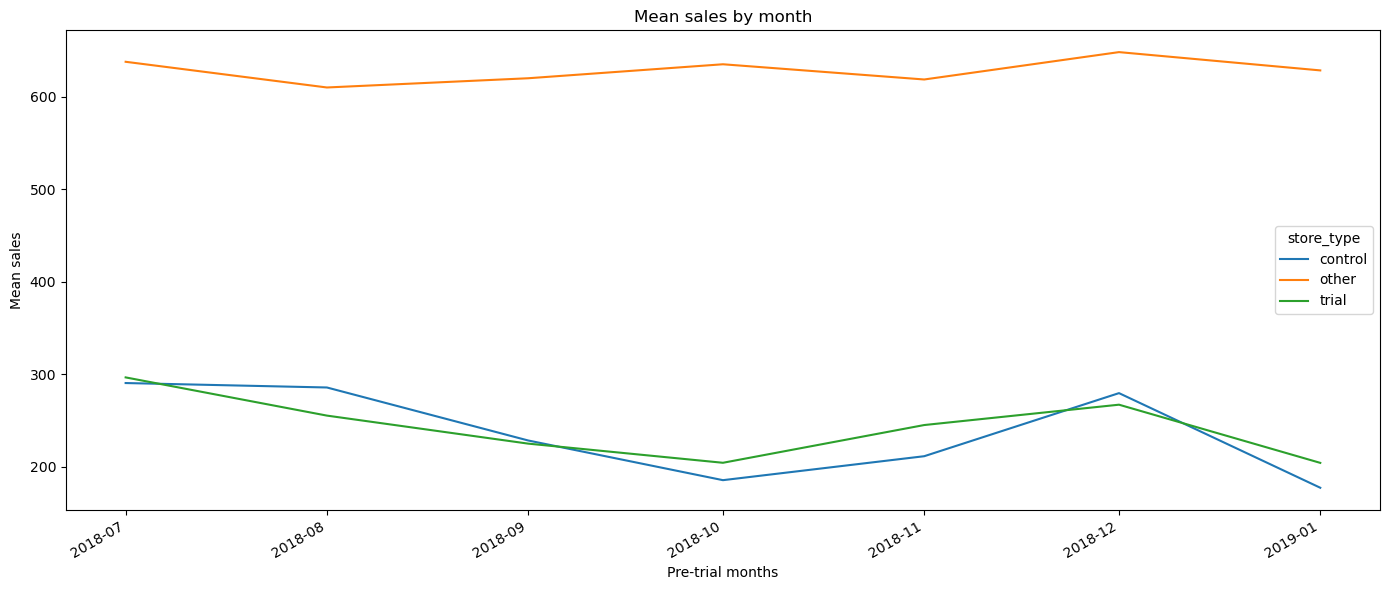

In [29]:
fig, ax = plt.subplots(figsize=(14, 6))

for st, g in grouped_type_sales.sort_values("month_year").groupby("store_type"):
    plt.plot(g["month_year"], g["mean_sales"], label=st)

ax.set_title("Mean sales by month")
ax.set_xlabel("Pre-trial months")
ax.set_ylabel("Mean sales")
ax.legend(title="store_type", loc = 'center right')

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

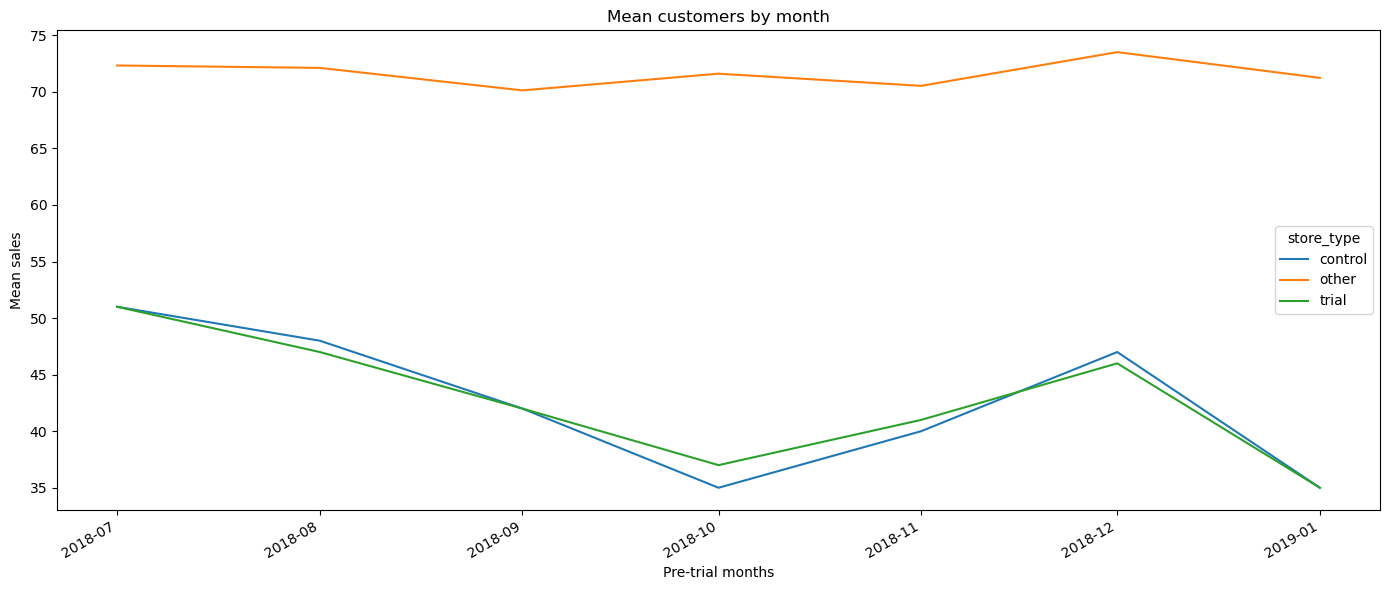

In [30]:
grouped_type_cust = viz_df[viz_df['month_year'] < '2019-02-01'][['month_year', 'store_type', 'tot_cust']].groupby(['month_year', 'store_type'])['tot_cust'].mean().reset_index(name = 'mean_customers')

fig, ax = plt.subplots(figsize=(14, 6))

for st, g in grouped_type_cust.sort_values("month_year").groupby("store_type"):
    plt.plot(g["month_year"], g["mean_customers"], label=st)

ax.set_title("Mean customers by month")
ax.set_xlabel("Pre-trial months")
ax.set_ylabel("Mean sales")
ax.legend(title="store_type", loc = 'center right')

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [31]:
df_t1 = df[df['STORE_NBR'].isin([trial, control])]

In [32]:
df_t1_grouped = df_t1.groupby(['STORE_NBR', 'month_year']).agg(tot_sales_rev = ('TOT_SALES', 'sum'), tot_cust = ('LYLTY_CARD_NBR', 'nunique')).reset_index()
df_t1_grouped['tot_cust'] = df_t1_grouped['tot_cust'].astype('float64')

In [33]:
pre_trial_t1 = df_t1_grouped[df_t1_grouped['month_year'].isin(pre_trial_months)]
scale1 = pre_trial_t1[pre_trial_t1['STORE_NBR'] == trial]['tot_sales_rev'].sum() / pre_trial_t1[pre_trial_t1['STORE_NBR'] == control]['tot_sales_rev'].sum()
scale2 = pre_trial_t1[pre_trial_t1['STORE_NBR'] == trial]['tot_cust'].sum() / pre_trial_t1[pre_trial_t1['STORE_NBR'] == control]['tot_cust'].sum()

In [34]:
df_t1_grouped.loc[df_t1_grouped['STORE_NBR'] == control, 'tot_sales_rev'] *= scale1
df_t1_grouped.loc[df_t1_grouped['STORE_NBR'] == control, 'tot_cust'] *= scale2

In [35]:
t1_pivot_sales = df_t1_grouped.pivot_table(values = 'tot_sales_rev', index = 'month_year', columns = 'STORE_NBR')
t1_pivot_sales['sales_pdiff'] = (t1_pivot_sales[trial] - t1_pivot_sales[control])/t1_pivot_sales[control]

In [36]:
sd1 = t1_pivot_sales.loc[t1_pivot_sales.index < '2019-02', 'sales_pdiff'].std()
t_02_1 = t1_pivot_sales.loc['2019-02', 'sales_pdiff'] / sd1
t_03_1 = t1_pivot_sales.loc['2019-03', 'sales_pdiff'] / sd1
t_04_1 = t1_pivot_sales.loc['2019-04', 'sales_pdiff'] / sd1
t_crit_95_6 = stats.t.ppf(0.95, df=6)

In [37]:
t1_pivot_cust = df_t1_grouped.pivot_table(values = 'tot_cust', index = 'month_year', columns = 'STORE_NBR')
t1_pivot_cust['cust_pdiff'] = (t1_pivot_cust[trial] - t1_pivot_cust[control])/t1_pivot_cust[control]

In [38]:
sd2 = t1_pivot_cust.loc[t1_pivot_cust.index < '2019-02', 'cust_pdiff'].std()
t_02_2 = t1_pivot_cust.loc['2019-02', 'cust_pdiff'] / sd2
t_03_2 = t1_pivot_cust.loc['2019-03', 'cust_pdiff'] / sd2
t_04_2 = t1_pivot_cust.loc['2019-04', 'cust_pdiff'] / sd2

In [39]:
t_table = pd.DataFrame({'Feb':[t_02_1, t_02_2], 'Mar': [t_03_1, t_03_2], 'Apr': [t_04_1, t_04_2], 'Crit_value': [t_crit_95_6, t_crit_95_6]}, index = ['Sales', 'Customer'])
t_table

,Feb,Mar,Apr,Crit_value
Sales,-0.593520,3.680430,6.256669,1.94318
Customer,-0.121884,8.958446,20.460197,1.94318


In [40]:
whole_period = cleaned_df.groupby(['STORE_NBR', 'month_year']).agg(tot_sales_rev = ('TOT_SALES', 'sum'), tot_cust = ('LYLTY_CARD_NBR', 'nunique')).reset_index()
whole_period["month_year"] = whole_period["month_year"].dt.to_timestamp()
whole_period['store_type'] = whole_period['STORE_NBR'].apply(categorize_store, trial = trial, control = control)

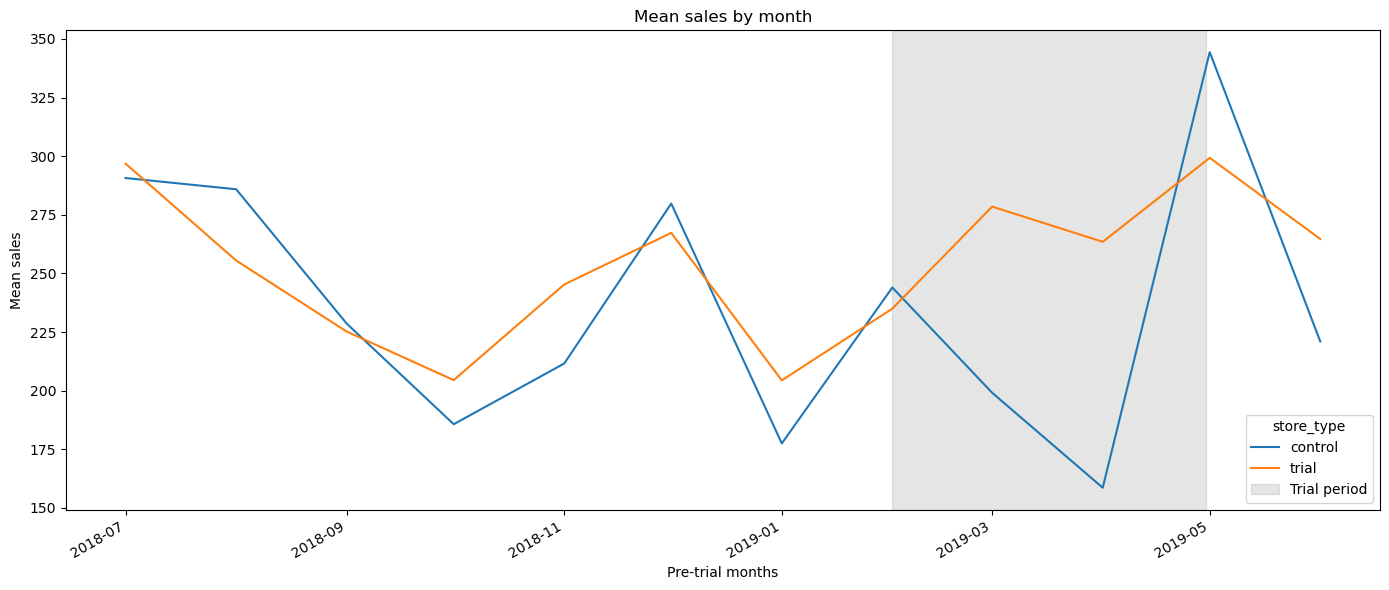

In [47]:
whole_period_sales = whole_period[whole_period['store_type'].isin(['control', 'trial'])][['month_year', 'store_type', 'tot_sales_rev']].groupby(['month_year', 'store_type'])['tot_sales_rev'].mean().reset_index(name = 'mean_sales')

fig, ax = plt.subplots(figsize=(14, 6))

for st, g in whole_period_sales.sort_values("month_year").groupby("store_type"):
    plt.plot(g["month_year"], g["mean_sales"], label=st)

# shade trial window
ax.axvspan(
    pd.to_datetime("2019-02-01"),
    pd.to_datetime("2019-04-30"),
    color="grey",
    alpha=0.2,
    label="Trial period"
)

ax.set_title("Mean sales by month")
ax.set_xlabel("Pre-trial months")
ax.set_ylabel("Mean sales")
ax.legend(title="store_type", loc = 'lower right')

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

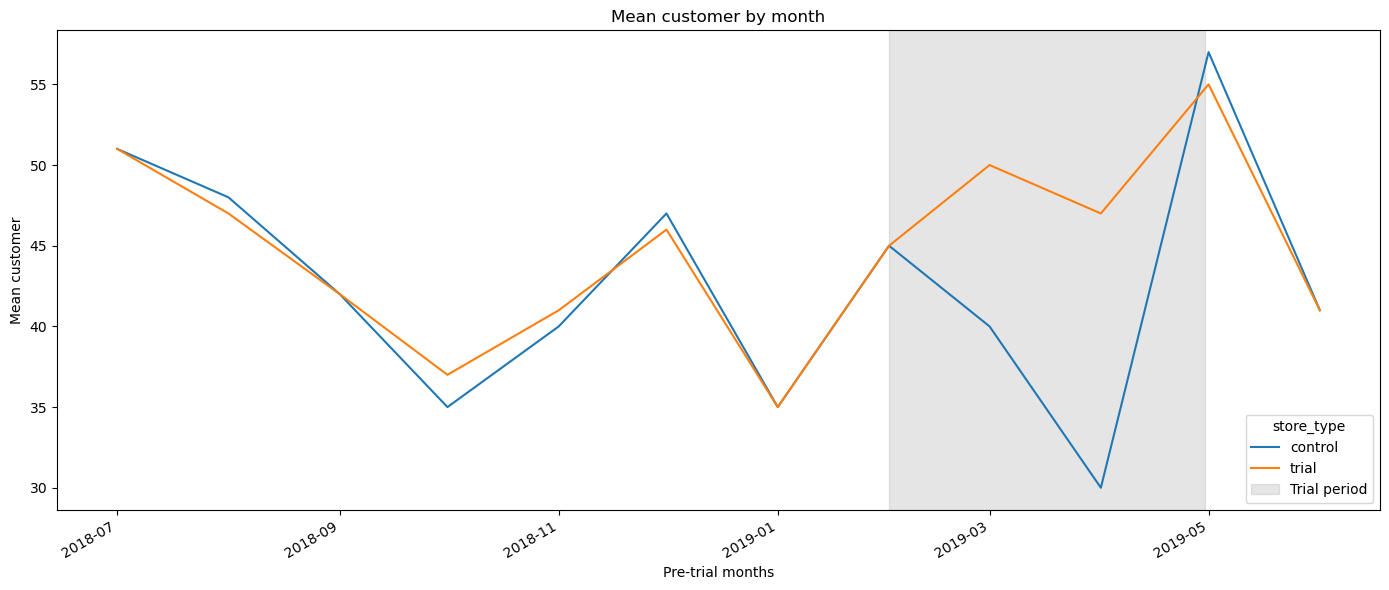

In [46]:
whole_period_cust = whole_period[whole_period['store_type'].isin(['control', 'trial'])][['month_year', 'store_type', 'tot_cust']].groupby(['month_year', 'store_type'])['tot_cust'].mean().reset_index(name = 'mean_cust')

fig, ax = plt.subplots(figsize=(14, 6))

for st, g in whole_period_cust.sort_values("month_year").groupby("store_type"):
    plt.plot(g["month_year"], g["mean_cust"], label=st)

# shade trial window
ax.axvspan(
    pd.to_datetime("2019-02-01"),
    pd.to_datetime("2019-04-30"),
    color="grey",
    alpha=0.2,
    label="Trial period"
)

ax.set_title("Mean customer by month")
ax.set_xlabel("Pre-trial months")
ax.set_ylabel("Mean customer")
ax.legend(title="store_type", loc = 'lower right')

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

The results show that the trial in store 77 is significantly different to its control store in the trial period as
the trial store performance lies outside the 5% to 95% confidence interval of the control store in two of the
three trial months.

### Trail store 86

In [48]:
trial = 86
control = 155

In [49]:
viz_df2 = grouped_df.copy()

In [50]:
viz_df2['store_type'] = viz_df2['STORE_NBR'].apply(categorize_store, trial = trial, control = control)

viz_df2["month_year"] = viz_df2["month_year"].dt.to_timestamp()

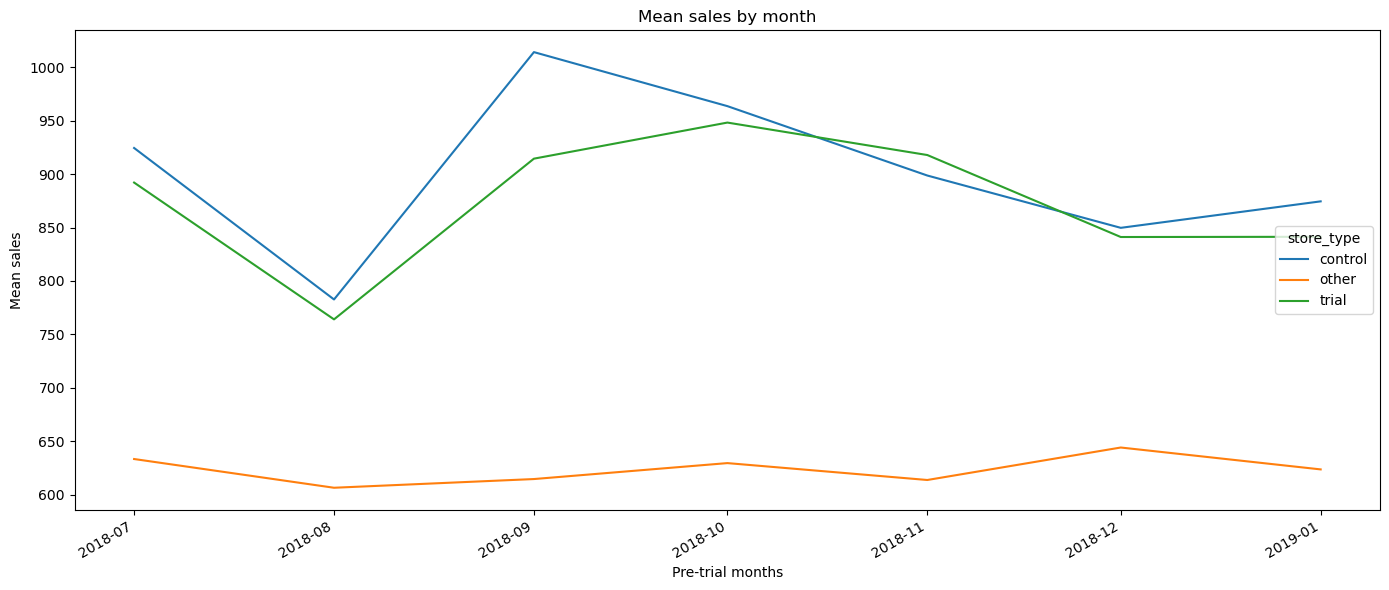

In [51]:
grouped_type_sales2 = viz_df2[viz_df2['month_year'] < '2019-02-01'][['month_year', 'store_type', 'tot_sales_rev']].groupby(['month_year', 'store_type'])['tot_sales_rev'].mean().reset_index(name = 'mean_sales')

fig, ax = plt.subplots(figsize=(14, 6))

for st, g in grouped_type_sales2.sort_values("month_year").groupby("store_type"):
    plt.plot(g["month_year"], g["mean_sales"], label=st)

ax.set_title("Mean sales by month")
ax.set_xlabel("Pre-trial months")
ax.set_ylabel("Mean sales")
ax.legend(title="store_type", loc = 'center right')

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

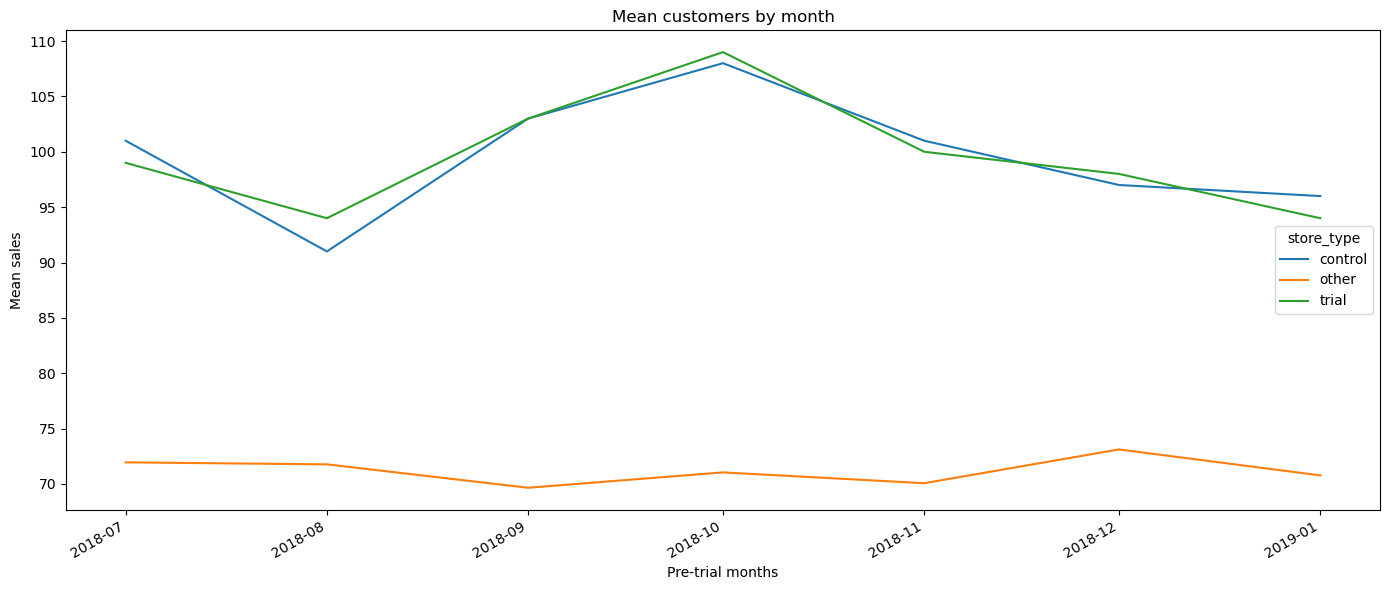

In [52]:
grouped_type_cust2 = viz_df2[viz_df2['month_year'] < '2019-02-01'][['month_year', 'store_type', 'tot_cust']].groupby(['month_year', 'store_type'])['tot_cust'].mean().reset_index(name = 'mean_customers')

fig, ax = plt.subplots(figsize=(14, 6))

for st, g in grouped_type_cust2.sort_values("month_year").groupby("store_type"):
    plt.plot(g["month_year"], g["mean_customers"], label=st)

ax.set_title("Mean customers by month")
ax.set_xlabel("Pre-trial months")
ax.set_ylabel("Mean sales")
ax.legend(title="store_type", loc = 'center right')

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [53]:
df_t2 = df[df['STORE_NBR'].isin([trial, control])]

In [54]:
df_t2_grouped = df_t2.groupby(['STORE_NBR', 'month_year']).agg(tot_sales_rev = ('TOT_SALES', 'sum'), tot_cust = ('LYLTY_CARD_NBR', 'nunique')).reset_index()
df_t2_grouped['tot_cust'] = df_t2_grouped['tot_cust'].astype('float64')

In [55]:
pre_trial_t2 = df_t2_grouped[df_t2_grouped['month_year'].isin(pre_trial_months)]
scale3 = pre_trial_t2[pre_trial_t2['STORE_NBR'] == trial]['tot_sales_rev'].sum() / pre_trial_t2[pre_trial_t2['STORE_NBR'] == control]['tot_sales_rev'].sum()
scale4 = pre_trial_t2[pre_trial_t2['STORE_NBR'] == trial]['tot_cust'].sum() / pre_trial_t2[pre_trial_t2['STORE_NBR'] == control]['tot_cust'].sum()

In [56]:
df_t2_grouped.loc[df_t2_grouped['STORE_NBR'] == control, 'tot_sales_rev'] *= scale3
df_t2_grouped.loc[df_t2_grouped['STORE_NBR'] == control, 'tot_cust'] *= scale4

In [57]:
t2_pivot_sales = df_t2_grouped.pivot_table(values = 'tot_sales_rev', index = 'month_year', columns = 'STORE_NBR')
t2_pivot_sales['sales_pdiff'] = (t2_pivot_sales[trial] - t2_pivot_sales[control])/t2_pivot_sales[control]

In [58]:
sd3 = t2_pivot_sales.loc[t2_pivot_sales.index < '2019-02', 'sales_pdiff'].std()
t_02_3 = t2_pivot_sales.loc['2019-02', 'sales_pdiff'] / sd3
t_03_3 = t2_pivot_sales.loc['2019-03', 'sales_pdiff'] / sd3
t_04_3 = t2_pivot_sales.loc['2019-04', 'sales_pdiff'] / sd3

In [59]:
t2_pivot_cust = df_t2_grouped.pivot_table(values = 'tot_cust', index = 'month_year', columns = 'STORE_NBR')
t2_pivot_cust['cust_pdiff'] = (t2_pivot_cust[trial] - t2_pivot_cust[control])/t2_pivot_cust[control]

In [60]:
sd4 = t2_pivot_cust.loc[t2_pivot_cust.index < '2019-02', 'cust_pdiff'].std()
t_02_4 = t2_pivot_cust.loc['2019-02', 'cust_pdiff'] / sd4
t_03_4 = t2_pivot_cust.loc['2019-03', 'cust_pdiff'] / sd4
t_04_4 = t2_pivot_cust.loc['2019-04', 'cust_pdiff'] / sd4

In [61]:
t_table2 = pd.DataFrame({'Feb':[t_02_3, t_02_4], 'Mar': [t_03_3, t_03_4], 'Apr': [t_04_3, t_04_4], 'Crit_value': [t_crit_95_6, t_crit_95_6]}, index = ['Sales', 'Customer'])
t_table2

,Feb,Mar,Apr,Crit_value
Sales,1.494114,8.381769,0.935444,1.94318
Customer,6.592964,11.660429,3.163291,1.94318


In [62]:
whole_period2 = cleaned_df.groupby(['STORE_NBR', 'month_year']).agg(tot_sales_rev = ('TOT_SALES', 'sum'), tot_cust = ('LYLTY_CARD_NBR', 'nunique')).reset_index()
whole_period2["month_year"] = whole_period2["month_year"].dt.to_timestamp()
whole_period2['store_type'] = whole_period2['STORE_NBR'].apply(categorize_store, trial = trial, control = control)

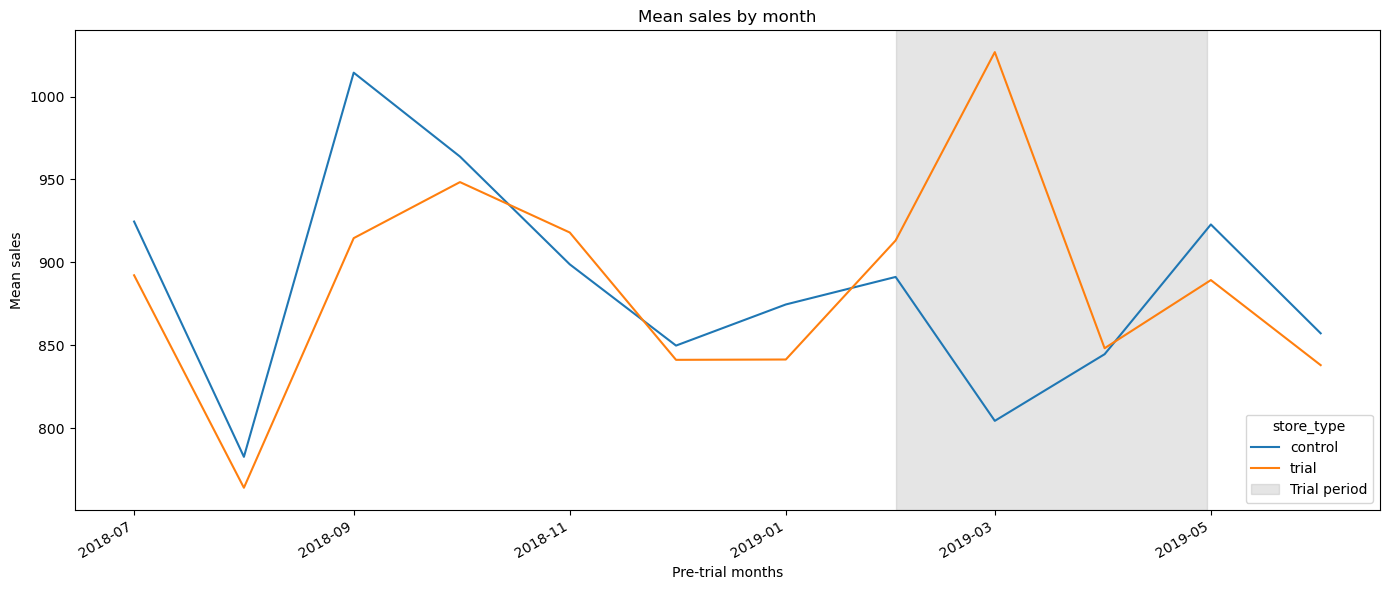

In [63]:
whole_period_sales2 = whole_period2[whole_period2['store_type'].isin(['control', 'trial'])][['month_year', 'store_type', 'tot_sales_rev']].groupby(['month_year', 'store_type'])['tot_sales_rev'].mean().reset_index(name = 'mean_sales')

fig, ax = plt.subplots(figsize=(14, 6))

for st, g in whole_period_sales2.sort_values("month_year").groupby("store_type"):
    plt.plot(g["month_year"], g["mean_sales"], label=st)

# shade trial window
ax.axvspan(
    pd.to_datetime("2019-02-01"),
    pd.to_datetime("2019-04-30"),
    color="grey",
    alpha=0.2,
    label="Trial period"
)

ax.set_title("Mean sales by month")
ax.set_xlabel("Pre-trial months")
ax.set_ylabel("Mean sales")
ax.legend(title="store_type", loc = 'lower right')

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

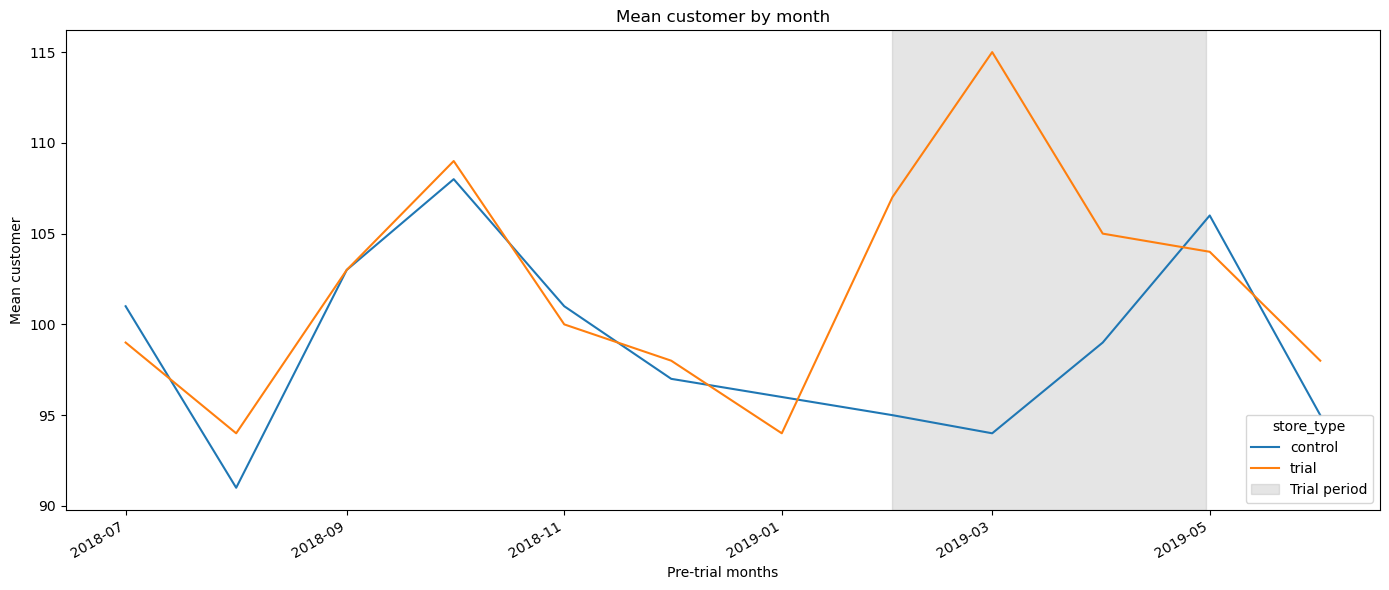

In [64]:
whole_period_cust2 = whole_period2[whole_period2['store_type'].isin(['control', 'trial'])][['month_year', 'store_type', 'tot_cust']].groupby(['month_year', 'store_type'])['tot_cust'].mean().reset_index(name = 'mean_cust')

fig, ax = plt.subplots(figsize=(14, 6))

for st, g in whole_period_cust2.sort_values("month_year").groupby("store_type"):
    plt.plot(g["month_year"], g["mean_cust"], label=st)

# shade trial window
ax.axvspan(
    pd.to_datetime("2019-02-01"),
    pd.to_datetime("2019-04-30"),
    color="grey",
    alpha=0.2,
    label="Trial period"
)

ax.set_title("Mean customer by month")
ax.set_xlabel("Pre-trial months")
ax.set_ylabel("Mean customer")
ax.legend(title="store_type", loc = 'lower right')

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

- The results show that the trial in store 86 is not significantly different to its control store in the trial period
as the trial store performance lies inside the 5% to 95% confidence interval of the control store in two of the
three trial months.

- It looks like the number of customers is significantly higher in all of the three months. This seems to
suggest that the trial had a significant impact on increasing the number of customers in trial store 86 but
as we saw, sales were not significantly higher. We should check if there were
special deals in the trial store that were may have resulted in lower prices, impacting the results.

### Trial store 88

In [121]:
trial = 88
control = 237

In [122]:
viz_df3 = grouped_df.copy()

In [123]:
viz_df3['store_type'] = viz_df3['STORE_NBR'].apply(categorize_store, trial = trial, control = control)

viz_df3["month_year"] = viz_df3["month_year"].dt.to_timestamp()

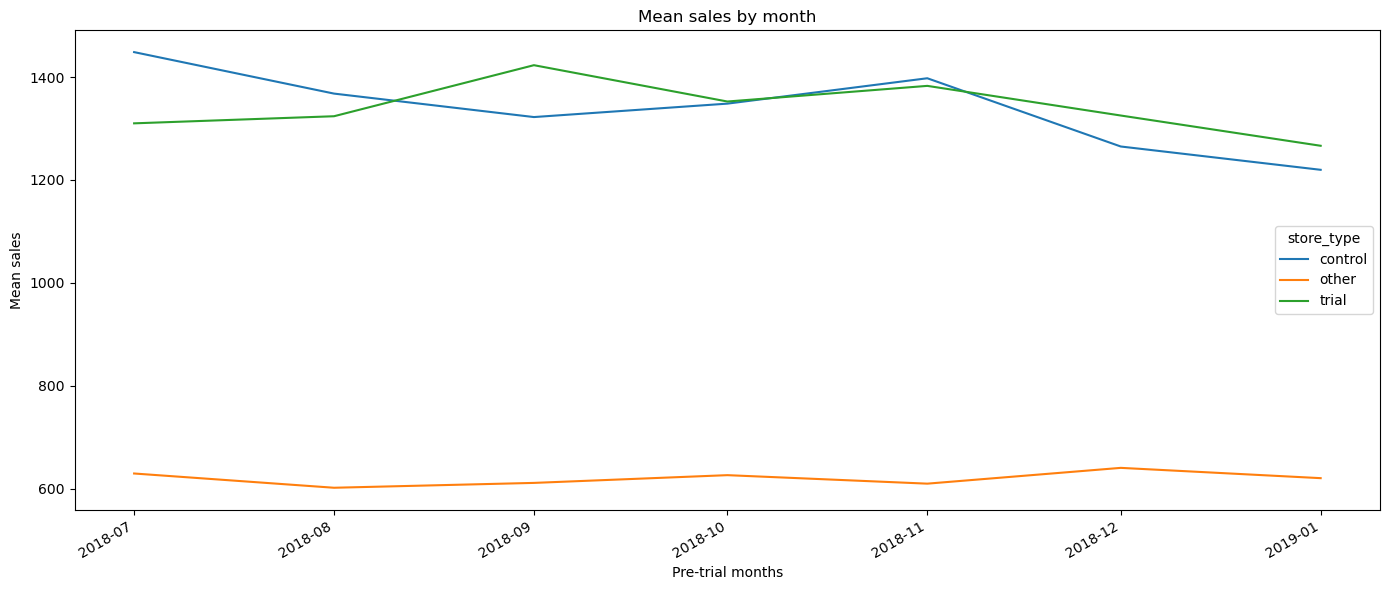

In [124]:
grouped_type_sales3 = viz_df3[viz_df3['month_year'] < '2019-02-01'][['month_year', 'store_type', 'tot_sales_rev']].groupby(['month_year', 'store_type'])['tot_sales_rev'].mean().reset_index(name = 'mean_sales')

fig, ax = plt.subplots(figsize=(14, 6))

for st, g in grouped_type_sales3.sort_values("month_year").groupby("store_type"):
    plt.plot(g["month_year"], g["mean_sales"], label=st)

ax.set_title("Mean sales by month")
ax.set_xlabel("Pre-trial months")
ax.set_ylabel("Mean sales")
ax.legend(title="store_type", loc = 'center right')

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

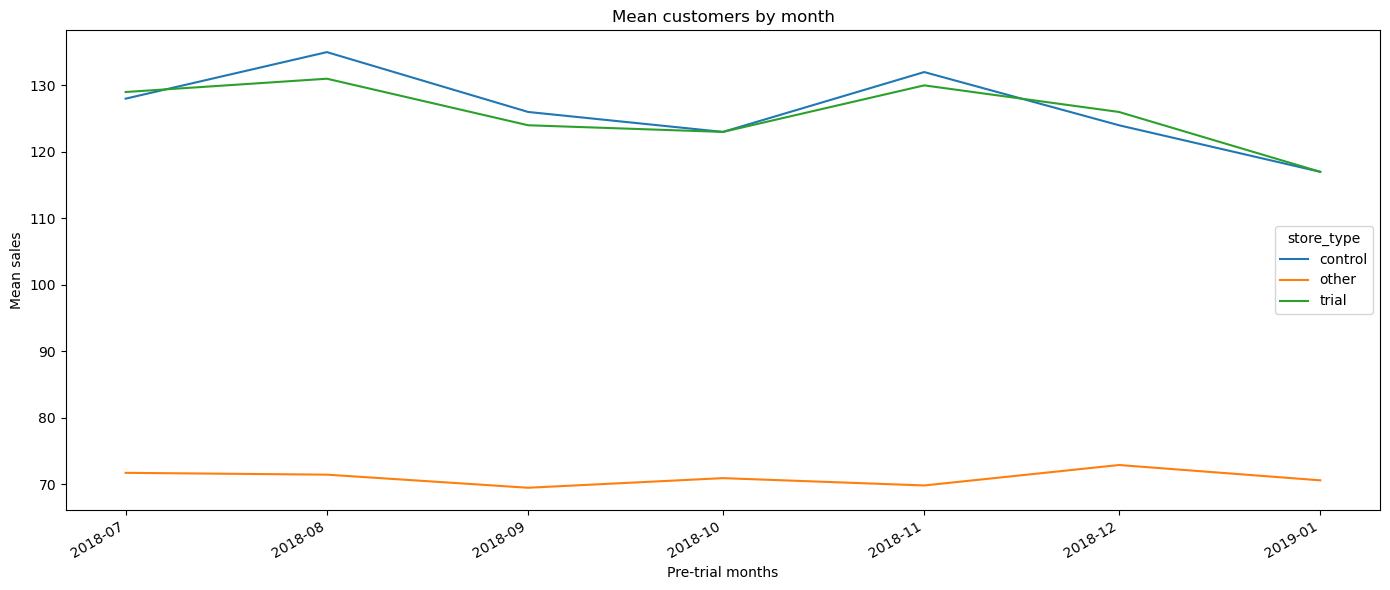

In [125]:
grouped_type_cust3 = viz_df3[viz_df3['month_year'] < '2019-02-01'][['month_year', 'store_type', 'tot_cust']].groupby(['month_year', 'store_type'])['tot_cust'].mean().reset_index(name = 'mean_customers')

fig, ax = plt.subplots(figsize=(14, 6))

for st, g in grouped_type_cust3.sort_values("month_year").groupby("store_type"):
    plt.plot(g["month_year"], g["mean_customers"], label=st)

ax.set_title("Mean customers by month")
ax.set_xlabel("Pre-trial months")
ax.set_ylabel("Mean sales")
ax.legend(title="store_type", loc = 'center right')

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [135]:
df_t3 = df[df['STORE_NBR'].isin([trial, control])]

In [136]:
df_t3_grouped = df_t3.groupby(['STORE_NBR', 'month_year']).agg(tot_sales_rev = ('TOT_SALES', 'sum'), tot_cust = ('LYLTY_CARD_NBR', 'nunique')).reset_index()
df_t3_grouped['tot_cust'] = df_t3_grouped['tot_cust'].astype('float64')

In [137]:
pre_trial_t3 = df_t3_grouped[df_t3_grouped['month_year'].isin(pre_trial_months)]
scale5 = pre_trial_t3[pre_trial_t3['STORE_NBR'] == trial]['tot_sales_rev'].sum() / pre_trial_t3[pre_trial_t3['STORE_NBR'] == control]['tot_sales_rev'].sum()
scale6 = pre_trial_t3[pre_trial_t3['STORE_NBR'] == trial]['tot_cust'].sum() / pre_trial_t3[pre_trial_t3['STORE_NBR'] == control]['tot_cust'].sum()

In [138]:
df_t3_grouped.loc[df_t3_grouped['STORE_NBR'] == control, 'tot_sales_rev'] *= scale5
df_t3_grouped.loc[df_t3_grouped['STORE_NBR'] == control, 'tot_cust'] *= scale6

In [139]:
t3_pivot_sales = df_t3_grouped.pivot_table(values = 'tot_sales_rev', index = 'month_year', columns = 'STORE_NBR')
t3_pivot_sales['sales_pdiff'] = (t3_pivot_sales[trial] - t3_pivot_sales[control])/t3_pivot_sales[control]

In [140]:
sd5 = t3_pivot_sales.loc[t3_pivot_sales.index < '2019-02', 'sales_pdiff'].std()
t_02_5 = t3_pivot_sales.loc['2019-02', 'sales_pdiff'] / sd5
t_03_5 = t3_pivot_sales.loc['2019-03', 'sales_pdiff'] / sd5
t_04_5 = t3_pivot_sales.loc['2019-04', 'sales_pdiff'] / sd5

In [141]:
t3_pivot_cust = df_t3_grouped.pivot_table(values = 'tot_cust', index = 'month_year', columns = 'STORE_NBR')
t3_pivot_cust['cust_pdiff'] = (t3_pivot_cust[trial] - t3_pivot_cust[control])/t3_pivot_cust[control]

In [142]:
sd6 = t3_pivot_cust.loc[t3_pivot_cust.index < '2019-02', 'cust_pdiff'].std()
t_02_6 = t3_pivot_cust.loc['2019-02', 'cust_pdiff'] / sd6
t_03_6 = t3_pivot_cust.loc['2019-03', 'cust_pdiff'] / sd6
t_04_6 = t3_pivot_cust.loc['2019-04', 'cust_pdiff'] / sd6

In [143]:
t_table3 = pd.DataFrame({'Feb':[t_02_5, t_02_6], 'Mar': [t_03_5, t_03_6], 'Apr': [t_04_5, t_04_6], 'Crit_value': [t_crit_95_6, t_crit_95_6]}, index = ['Sales', 'Customer'])
t_table3

,Feb,Mar,Apr,Crit_value
Sales,-0.456726,3.855795,3.372253,1.94318
Customer,-0.649164,8.362766,4.591985,1.94318


In [145]:
whole_period3 = cleaned_df.groupby(['STORE_NBR', 'month_year']).agg(tot_sales_rev = ('TOT_SALES', 'sum'), tot_cust = ('LYLTY_CARD_NBR', 'nunique')).reset_index()
whole_period3["month_year"] = whole_period3["month_year"].dt.to_timestamp()
whole_period3['store_type'] = whole_period3['STORE_NBR'].apply(categorize_store, trial = trial, control = control)

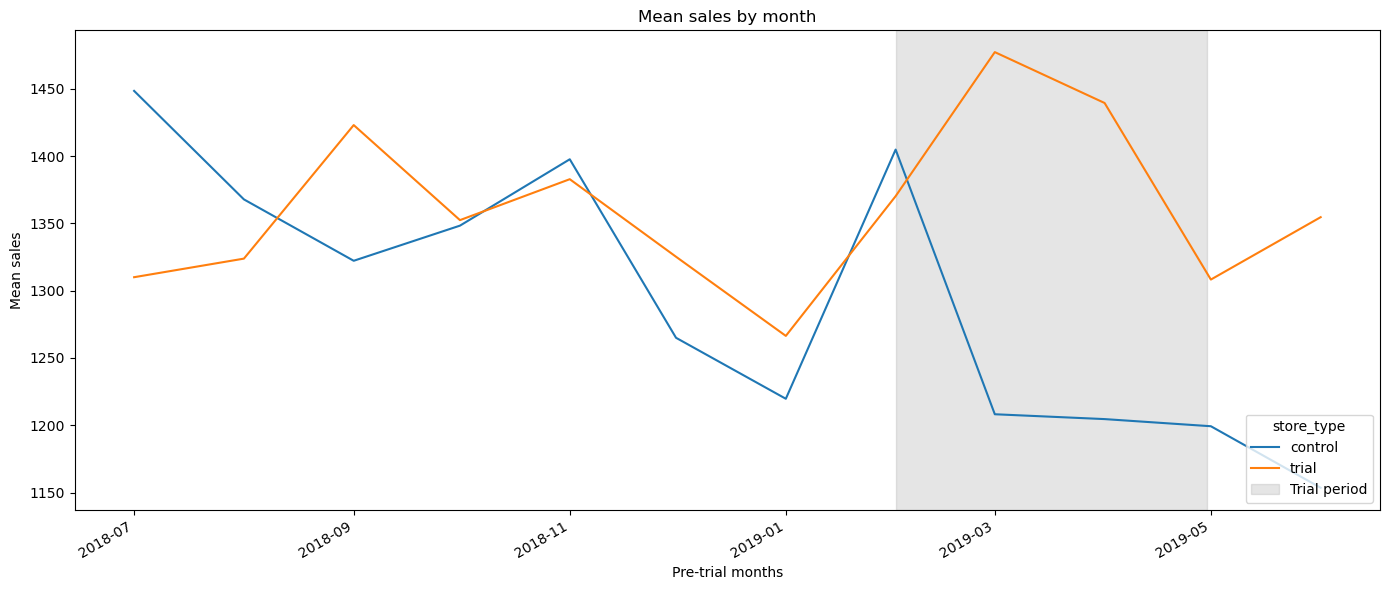

In [146]:
whole_period_sales3 = whole_period3[whole_period3['store_type'].isin(['control', 'trial'])][['month_year', 'store_type', 'tot_sales_rev']].groupby(['month_year', 'store_type'])['tot_sales_rev'].mean().reset_index(name = 'mean_sales')

fig, ax = plt.subplots(figsize=(14, 6))

for st, g in whole_period_sales3.sort_values("month_year").groupby("store_type"):
    plt.plot(g["month_year"], g["mean_sales"], label=st)

# shade trial window
ax.axvspan(
    pd.to_datetime("2019-02-01"),
    pd.to_datetime("2019-04-30"),
    color="grey",
    alpha=0.2,
    label="Trial period"
)

ax.set_title("Mean sales by month")
ax.set_xlabel("Pre-trial months")
ax.set_ylabel("Mean sales")
ax.legend(title="store_type", loc = 'lower right')

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

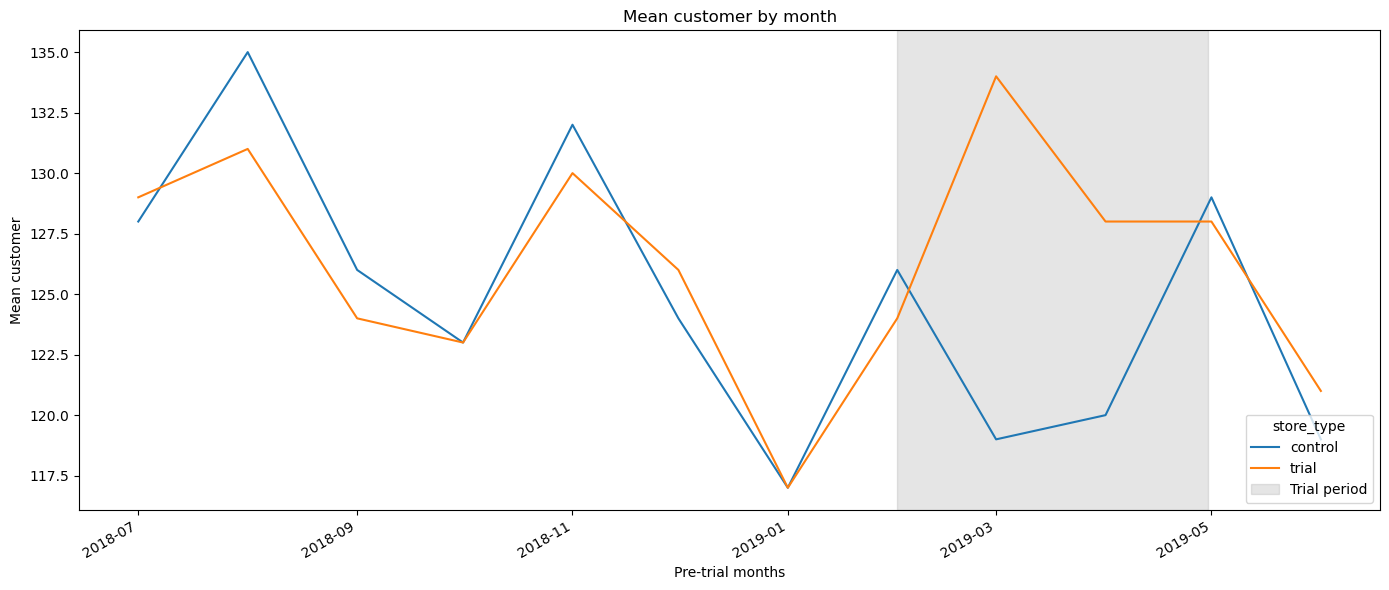

In [147]:
whole_period_cust3 = whole_period3[whole_period3['store_type'].isin(['control', 'trial'])][['month_year', 'store_type', 'tot_cust']].groupby(['month_year', 'store_type'])['tot_cust'].mean().reset_index(name = 'mean_cust')

fig, ax = plt.subplots(figsize=(14, 6))

for st, g in whole_period_cust3.sort_values("month_year").groupby("store_type"):
    plt.plot(g["month_year"], g["mean_cust"], label=st)

# shade trial window
ax.axvspan(
    pd.to_datetime("2019-02-01"),
    pd.to_datetime("2019-04-30"),
    color="grey",
    alpha=0.2,
    label="Trial period"
)

ax.set_title("Mean customer by month")
ax.set_xlabel("Pre-trial months")
ax.set_ylabel("Mean customer")
ax.legend(title="store_type", loc = 'lower right')

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

- The results show that the trial in store 88 is significantly different to its control store in the trial period as the
trial store performance lies outside of the 5% to 95% confidence interval of the control store in two of the
three trial months.
    
- Total number of customers in the trial period for the trial store is significantly higher than the control store
for two out of three months, which indicates a positive trial effect.

## Conclusion
The results for trial stores 77 and 88 during the trial period show a significant difference in at least two of the
three trial months but this is not the case for trial store 86. We can check with the client if the implementation
of the trial was different in trial store 86 but overall, the trial shows a significant increase in sales.